In [4]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\peter\anaconda3\lib\site-packages (1.5.3)



ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install statsmodels

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


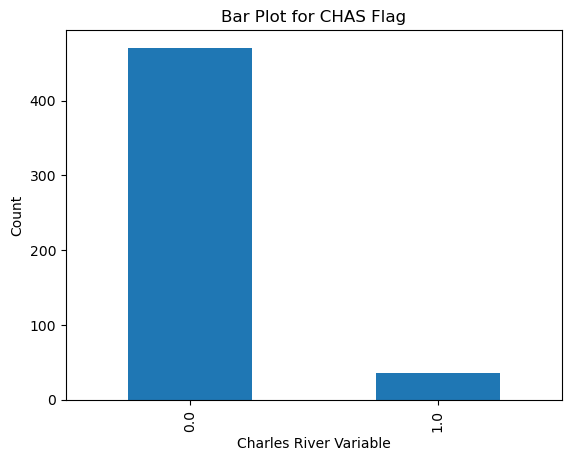

In [23]:
#Bar plot for CHAS flag
Q2 = boston_df.value_counts("CHAS")
Q2.plot(kind="bar")
plt.xlabel('Charles River Variable')
plt.ylabel('Count')
plt.title('Bar Plot for CHAS Flag')
plt.show()

In [25]:
age_bins = [0, 35, 70, boston_df['AGE'].max()]
age_labels = ['<=35', '35 - 70', '>70']

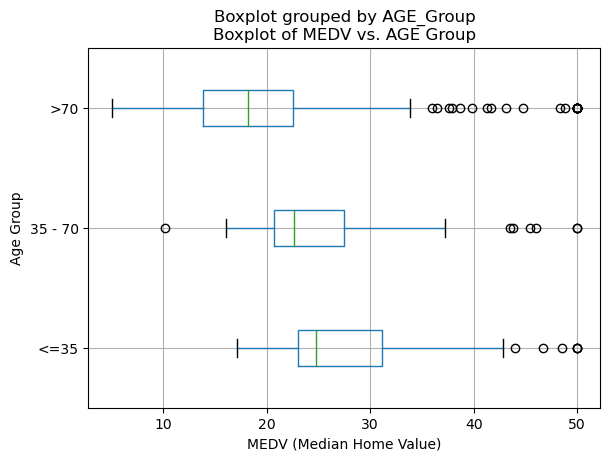

In [30]:
boston_df.boxplot(column='MEDV', by='AGE_Group', vert=False)
plt.xlabel('MEDV (Median Home Value)')
plt.ylabel('Age Group')
plt.title('Boxplot of MEDV vs. AGE Group')

plt.show()

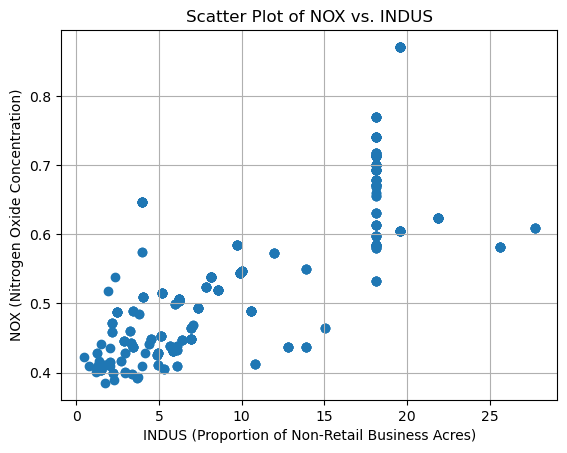

In [36]:
nox = boston_df['NOX']
indus = boston_df['INDUS']
plt.xlabel('INDUS (Proportion of Non-Retail Business Acres)')
plt.ylabel('NOX (Nitrogen Oxide Concentration)')
plt.title('Scatter Plot of NOX vs. INDUS')
plt.scatter(indus, nox)
plt.grid(True)
plt.show()

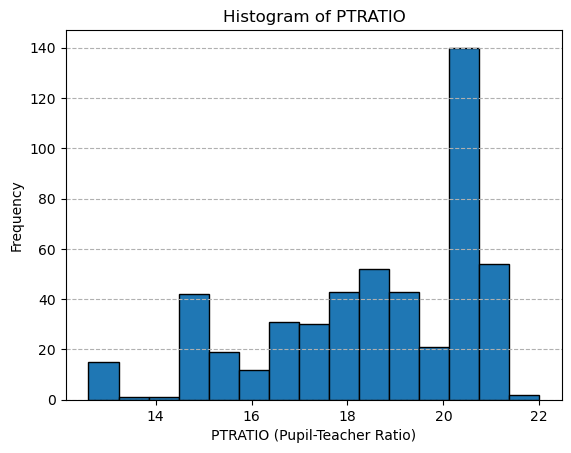

In [42]:
ptratio = boston_df['PTRATIO']
plt.hist(ptratio, bins=15, edgecolor='k')
plt.xlabel('PTRATIO (Pupil-Teacher Ratio)')
plt.ylabel('Frequency')
plt.title('Histogram of PTRATIO')
plt.grid(axis='y', linestyle='--')
plt.show()

In [46]:
#H0: There is no difference between the median values of houses bounded by the Charles River vs not
bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value = stats.ttest_ind(bounded, not_bounded)

alpha = 0.05

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p_value < alpha:
    print("There is a significant difference in the median values of houses.")
else:
    print("There is no significant difference in the median values of houses.")

T-Statistic: 3.996437466090509
P-Value: 7.390623170519905e-05
There is a significant difference in the median values of houses.


In [48]:
#H0: There is no difference in the median of house values
result = stats.f_oneway(boston_df[boston_df['AGE'] <= 35]['MEDV'],
                        boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70)]['MEDV'],
                        boston_df[boston_df['AGE'] > 70]['MEDV'])

alpha = 0.05

f_statistic = result.statistic
p_value = result.pvalue

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

if p_value < alpha:
    print("There is a significant difference in median values of houses.")
else:
    print("There is no significant difference in median values of houses.")

F-Statistic: 36.40764999196599
P-Value: 1.7105011022702984e-15
There is a significant difference in median values of houses.


In [49]:
#H0: there is no difference in median house values
nox = boston_df['NOX']
indus = boston_df['INDUS']

correlation_coefficient, p_value = stats.pearsonr(nox, indus)

alpha = 0.05

print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-Value:", p_value)

if p_value < alpha:
    print("There is a significant relationship between NOX and INDUS.")
else:
    print("There is no significant relationship between NOX and INDUS.")

Pearson Correlation Coefficient: 0.7636514469209162
P-Value: 7.913361061229697e-98
There is a significant relationship between NOX and INDUS.


In [52]:
X = boston_df['DIS']  
X = sm.add_constant(X) 
y = boston_df['MEDV']  

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        20:52:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0